In [1]:
#Not an accurate Analysis this is to be update ...
#Need to rework on it for better Sentiment analysis 

In [ ]:
import pandas as pd
import numpy as np
import os 

In [2]:
path = '/Users/mt/Desktop/python/webScrape/google_scrape'
filenames = []
for root, directories, files in os.walk(path, topdown=False):
    for name in files:
        filenames.append(os.path.join(root, name))
filenames

['/Users/mt/Desktop/python/webScrape/google_scrape/.ipynb_checkpoints/Sentiment_Analysis-checkpoint.ipynb',
 '/Users/mt/Desktop/python/webScrape/google_scrape/.ipynb_checkpoints/topic_modelling -checkpoint.ipynb',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/mallet.diagnostics.50.xml',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/mallet.model.50',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/mallet.word_weights.50',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/training.txt',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/mallet.training',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/mallet.topic_keys.50',
 '/Users/mt/Desktop/python/webScrape/google_scrape/topic-model-output/corruption/mallet.topic_distributions.50',
 '/Users/mt/Desktop/python/webScrape/google_scrape/congo_cor

In [9]:
data = pd.read_csv("/Users/mt/Desktop/python/webScrape/google_scrape/corruption.csv")

In [10]:
data

,Unnamed: 0,0
0,0,Help us continue to fight human rights abuses....
1,1,Authorities in the Democratic Republic of Cong...
2,2,Human Rights Watch defends the rights of peopl...
3,3,Get updates on human rights issues from around...
4,4,OTHER WIDGETS
...,...,...
590,590,"Sign up to receive our original, on-the-ground..."
591,591,Sign up
592,592,Support our journalism and become more involve...
593,593,Join


In [11]:
data = data.rename(columns = {'0':'Notes'})
data.head()

,Unnamed: 0,Notes
0,0,Help us continue to fight human rights abuses....
1,1,Authorities in the Democratic Republic of Cong...
2,2,Human Rights Watch defends the rights of peopl...
3,3,Get updates on human rights issues from around...
4,4,OTHER WIDGETS


In [12]:
data = data.drop(['Unnamed: 0'], axis =1)

In [13]:
data.head(3)

,Notes
0,Help us continue to fight human rights abuses....
1,Authorities in the Democratic Republic of Cong...
2,Human Rights Watch defends the rights of peopl...


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in data['Notes']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:30])

[{'neg': 0.274, 'neu': 0.5, 'pos': 0.226, 'compound': -0.3818, 'headline': 'Help us continue to fight human rights abuses. Please give now to support our workAllegedly Embezzled Millions Helped Deprive Congolese of Their Rights@thfessy'}, {'neg': 0.058, 'neu': 0.862, 'pos': 0.08, 'compound': 0.8943, 'headline': "Authorities in the Democratic Republic of Congo confirmed last week that they had opened an inquiry following allegations of high-level corruption reported by a consortium of media and international groups. Investigators from 18 countries, working with 19 media outlets and 5 nongovernmental organizations, spent months going through 3.5 million leaked documents to produce “Congo Hold-Up,” a stunning account of corruption under former president Joseph Kabila.The documents, obtained by Mediapart and the Platform to Protect Whistleblowers in Africa, are from BGFIBank Group (Banque Gabonaise et Française Internationale), a private bank allegedly used to channel millions of dollars’ 

In [16]:
data = pd.DataFrame.from_records(results)
data.head()

,neg,neu,pos,compound,headline
0,0.274,0.500,0.226,-0.3818,Help us continue to fight human rights abuses....
1,0.058,0.862,0.080,0.8943,Authorities in the Democratic Republic of Cong...
2,0.224,0.640,0.136,-0.2960,Human Rights Watch defends the rights of peopl...
3,0.000,0.934,0.066,0.2960,Get updates on human rights issues from around...
4,0.000,1.000,0.000,0.0000,OTHER WIDGETS


In [17]:
# We will consider posts with a compound value greater than 0.2 as positive and less than -0.2 as negative.

In [19]:
data['label'] = 0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data.head()

,neg,neu,pos,compound,headline,label
0,0.274,0.500,0.226,-0.3818,Help us continue to fight human rights abuses....,-1
1,0.058,0.862,0.080,0.8943,Authorities in the Democratic Republic of Cong...,1
2,0.224,0.640,0.136,-0.2960,Human Rights Watch defends the rights of peopl...,-1
3,0.000,0.934,0.066,0.2960,Get updates on human rights issues from around...,1
4,0.000,1.000,0.000,0.0000,OTHER WIDGETS,0


In [29]:
import pprint
print("Positive headlines:\n")
pprint.pprint(list(data[data['label'] == 1].headline)[:5], width=200)


Positive headlines:

['Authorities in the Democratic Republic of Congo confirmed last week that they had opened an inquiry following allegations of high-level corruption reported by a consortium of media and '
 'international groups. Investigators from 18 countries, working with 19 media outlets and 5 nongovernmental organizations, spent months going through 3.5 million leaked documents to produce “Congo '
 'Hold-Up,” a stunning account of corruption under former president Joseph Kabila.The documents, obtained by Mediapart and the Platform to Protect Whistleblowers in Africa, are from BGFIBank Group '
 '(Banque Gabonaise et Française Internationale), a private bank allegedly used to channel millions of dollars’ worth of public funds to Kabila’s family and associates.Since November 19, “Congo '
 'Hold-Up” findings have been published almost daily, exposing a kleptocratic system that enabled the siphoning of state funds from Congo’s Central Bank, state-owned mining company Gecamines, the

In [30]:
print("\nNegative headlines:\n")
pprint.pprint(list(data[data['label'] == -1].headline)[:5], width=200)


Negative headlines:

['Help us continue to fight human rights abuses. Please give now to support our workAllegedly Embezzled Millions Helped Deprive Congolese of Their Rights@thfessy',
 'Human Rights Watch defends the rights of people in 90 countries worldwide, spotlighting abuses and bringing perpetrators to justice',
 'President Samia Suluhu Hassan has on Saturday fired a warning shot over corruption, saying a clique within government was out to taint her...',
 "The President of Zanzibar, Dr Hussein Ali Mwinyi, has outlined plans to construct the Manga Pwani Port that is expected to be the continent’s...Goma, Democratic Republic of Congo — 'We have all "
 "old machines, all old equipment.'Funding challenges and security threats are hampering the monitoring of one of the world's most volatile volcanoes - the Democratic Republic of Congo's Mount "
 'Nyiragongo - even after a May eruption cost dozens of lives and left tens of thousands of people living in displacement camps.Money is so

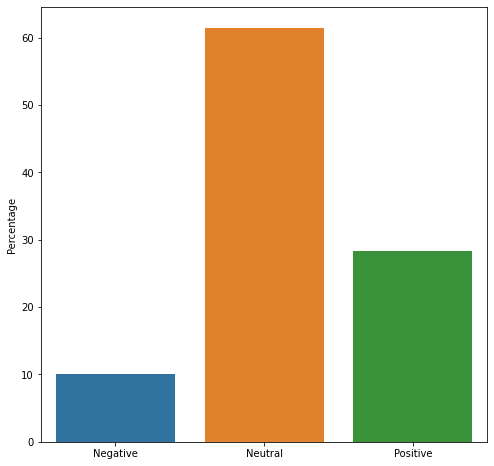

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig, ax = plt.subplots(figsize=(8, 8))

counts = data.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [39]:
from nltk.tokenize import word_tokenize, RegexpTokenizer


In [40]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [44]:
tokenizer = RegexpTokenizer(r'\w+')
example = '(DRC), where foreign companies purportedly bribed officials up to US$360 million between 2006 and 2011.More than 70% of the world’s cobalt comes from the resource-rich central African country, but more than 73% of its people live below the international poverty line'
tokenizer.tokenize(example)

['DRC',
 'where',
 'foreign',
 'companies',
 'purportedly',
 'bribed',
 'officials',
 'up',
 'to',
 'US',
 '360',
 'million',
 'between',
 '2006',
 'and',
 '2011',
 'More',
 'than',
 '70',
 'of',
 'the',
 'world',
 's',
 'cobalt',
 'comes',
 'from',
 'the',
 'resource',
 'rich',
 'central',
 'African',
 'country',
 'but',
 'more',
 'than',
 '73',
 'of',
 'its',
 'people',
 'live',
 'below',
 'the',
 'international',
 'poverty',
 'line']

In [41]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [42]:
#Positive Words

pos_lines = list(data[data.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

NameError: name 'tokenizer' is not defined